<div style="background-color: #D3D3D3; width:100%" >
  <center><b><p><div style="margin: auto; padding: 15px; color:#000000; font-size: 20px">A2: Analyzing Customer Churn</b></div>
<br>
<div style="font-size: 14px"><center><b>Computational Data Analytics with Python</div>
<hr style="width:100%; background-color: #D3D3D3; height:1px"></hr>
<div style="font-size: 14px"><center><b><i>Team 2</b>
<div style="font-size: 14px"><center><i>Alejandro Eguren
<div style="font-size: 14px"><center><i>Anastasiia Vasileva
<div style="font-size: 14px"><center><i>Gabriel Herrera
<div style="font-size: 14px"><center><i>Hafez Bajammal
<div style="font-size: 14px"><center><i>Isabella Carlos</div>
<hr style="width:100%; background-color: #D3D3D3; height:1px"></hr>

# Problem statement

The company is experiencing an unusual volume of customer churn, which can result in decrease in revenue and overall financial instability.

## Churning profile

### Problem statement

Identification of variables that impact on the churn rate.

### Understanding

We are using a historical database to evaluate if there are similarities among users that churned and their behavior. If we are able to identify a pattern, we can develop actions plans based on that learnings to avoid/reduce churn.

## Churning prediction

### Problem statement

Building a model to predict and identify factors impacting the churn rate.

### Understanding

We are predicting the churn by implementing a GBM model, and analyzing its performance; in order to predict if a customer will or will not churn. It is important to state that the prediction for the case in which the customer does churn is more relevant for the company.

 ## Recommendations & Results



Having in hand a model that can predict if the customer will or will not potentially churn, and the features that influence that decision, we can suggest actions that can be made to avoid or reduce this churn.

<b>Action 1: Increase the value charged on the month-to-month contract.</b>
<br><i>(Acting on the Month-to-month Contract and Total Charge features) 
    
We discovered that focusing on the Month-to-month Contracts and Total Charge features can help us improve customer retention. The company can specifically make the one-year and two-year contracts more appealing in terms of price to customers. Furthermore, extending the contract period increases the likelihood of retaining that customer. This strategy has the potential to significantly improve customer retention and reduce churn, thereby improving our overall business performance.
    
<b>Action 2: Increase customer satisfaction for users of Fiber Optics Internet Services .</b>
<br><i>(Acting on the Fiber Optics Internet Services feature)
    
After analyzing the data, we found that the rate of churn for internet services is much higher than the rest of the services provided. The FiberOptic internet service, the most expensive option, had the highest churn rate. Since fiber optic service is known to be more reliable and faster, we expected to see a lower churn rate, but the data proved this assumption to be wrong. This highlights the importance of user experience, which is a factor that is not directly measurable in the available data. We recommend revising and improving the company's approach to measure and analyze customer experience to better understand their needs and preferences and ultimately reduce the churn rate for internet services. 

    
<b>Action 3: Implement the prediction model to continusly assess and monitor churn-risk for new customers .</b>
<br><i>(Implement the prediction model)
    
We can take action to avoid or reduce churn now that we have developed a model that can predict potential churn. Therefore, we recommend that the model be used to continuously assess and monitor new customers' churn risk. This will facilitate the company to reach those at risk of leaving and take measures to retain them. Doing so can significantly reduce churn and improve customer satisfaction, benefiting the company's overall business performance.
    

## Problem 1


# Assumptions made

Our access to information related to the business and to the data provided was very limited, therefore to be able to work on the analysis, we had to make assumptions regarding the given information.

## Assumption 1

The total entries are based on 7934 rows. The 66 entries with missing values for the primary independent variable, "Churn", were replaced by the median values of the same column. A similar approach was applied when filling in missing values for the remaining data. 

For objects, the missing values were replaced with the mode of each column, and for numerical values, the missing values were replaced with the median of each column.

## Assumption 2

The geographical distribution of customers is a fair representation of the company's total reach.

Overall rate: 26.2%
- France: 26.5%
- Germany: 26.6%
- Spain 25.2%

Further, given the marginal difference in churn rates across different geographies in comparison to the overall churn rate, it is assumed there is no tendency in the churn rate when talking about geography. All of the contries will be considered in the analysis.

## Assumption 3

It is generally understood that individuals become senior citizens at the age when they retire from their employment. Accordingly, despite variations across different countries, it is reasonable to assume that the variable "Senior" pertains to a customer who is 65 years of age or older.

## Assumption 4

We assume that "Tenure" denotes the duration a customer has availed services from the company, expressed in months. This assumption has been substantiated by computing the ratio of "TotalCharges" to "MonthlyCharges".

# Limitations

## Limitation 1

The data available for analysis is sourced solely from the business and contains incomplete details and limited entries (8000).

## Limitation 2

Similarly, features such as 'CreditScore' do not provide complete information about the quality of customer experience or financial situation. 

## Limitation 3

The most significant shortcoming of the data is the lack of details on the customer experience with the company. Key factors such as customer service quality, responsiveness to complaints, and overall customer satisfaction are crucial in predicting customer churn. As a result, the limited information on these aspects poses a significant limitation to the data and could negatively impact the churn prediction model's accuracy.

## Limitation 4

Due to time constraints, obtaining additional data to supplement the current dataset may not be feasible. Therefore, it is critical to work within the existing data limitations and make the most of the available information to develop an accurate churn prediction model.

# Data

## Dataset: "A2"

This dataset contains specific attributes of all customers. By analyzing the variables it is possible to identify the users that churned and the specifics attributes that churned customers share. With this data it was also possible to build the model to predict the potential churn in customers.

<a href="https://mycourses.hult.edu/courses/3389812/files/232048355?module_item_id=79383080">Click here to download the data</a>

In [1]:
print("Importing libraries and reading the file")

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xgboost as xgb
from sklearn import preprocessing
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer

# importing data file a2.csv
file = pd.read_csv('A2.csv')

churn_df = file.copy()

Importing libraries and reading the file


In [2]:
# creating a list with the columns names
col_list = churn_df.columns.values.tolist()

# creating a list with the descriptions of the columns
desc_list = ["Index",
"Binary variable indicating the gender of the customer",
"Binary variable indicating whether the customer is a senior citizen",
"Binary variable indicating whether the customer has a partner",
"Number of months the customer has been with the company",
"Binary variable indicating whether the customer has phone service",
"Categorical variable indicating whether the customer has multiple phone lines",
"Categorical variable indicating the type of internet service used by the customer",
"Categorical variable indicating whether the customer has online security",
"Categorical variable indicating whether the customer has online backup",
"Categorical variable indicating whether the customer has a device insurance",
"Categorical variable indicating whether the customer has tech support",
"Categorical variable indicating whether the customer has streaming TV",
"Categorical variable indicating whether the customer has streaming movies",
"Categorical variable indicating the type of contract the customer has",
"Binary variable indicating whether the customer uses paperless billing",
"Total amount charged to the customer over their entire account history",
"Binary variable indicating whether the customer have canceled their service contract",
"Categorical variable indicating the country where the customer lives",
"Numerical value representing the credit score of the customer",
"Customer last name",
"Numerical value representing the estimated salary of the customer",
"Amount charged to the customer each month",
"Unique number identification of a customer",
"Binary variable indicating whether the customer has dependents",
"Categorical variable indicating the customer's preferred payment method",
"Binary variable indicating whether the customer was charged for any services during the previous month"]

# building a dataframe with the columns names and description
df = pd.DataFrame(list(zip(col_list,desc_list)), columns = ['Category','Description'])
pd.set_option('display.expand_frame_repr', False)
print(df)

            Category                                        Description
0         Unnamed: 0                                              Index
1             gender  Binary variable indicating the gender of the c...
2      SeniorCitizen  Binary variable indicating whether the custome...
3            Partner  Binary variable indicating whether the custome...
4             tenure  Number of months the customer has been with th...
5       PhoneService  Binary variable indicating whether the custome...
6      MultipleLines  Categorical variable indicating whether the cu...
7    InternetService  Categorical variable indicating the type of in...
8     OnlineSecurity  Categorical variable indicating whether the cu...
9       OnlineBackup  Categorical variable indicating whether the cu...
10  DeviceProtection  Categorical variable indicating whether the cu...
11       TechSupport  Categorical variable indicating whether the cu...
12       StreamingTV  Categorical variable indicating whether th

In [3]:
#Exploring the dataset
churn_df.info()

print(f"""
{"-" * 60}\n
Amount of null values in the data: 
{churn_df.isna().sum().sum()}""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8000 non-null   int64  
 1   gender            7938 non-null   object 
 2   SeniorCitizen     7954 non-null   float64
 3   Partner           7952 non-null   object 
 4   tenure            7938 non-null   float64
 5   PhoneService      7947 non-null   object 
 6   MultipleLines     7933 non-null   object 
 7   InternetService   7944 non-null   object 
 8   OnlineSecurity    7941 non-null   object 
 9   OnlineBackup      7960 non-null   object 
 10  DeviceProtection  7953 non-null   object 
 11  TechSupport       7954 non-null   object 
 12  StreamingTV       7950 non-null   object 
 13  StreamingMovies   7947 non-null   object 
 14  Contract          7952 non-null   object 
 15  PaperlessBilling  7952 non-null   object 
 16  TotalCharges      7961 non-null   object 


In [4]:
#Data cleaning
print("Cleaning the table and filling the null values")

# droping columns we are not using
churn_df.drop(['Unnamed: 0','customerID', 'Surname'], axis=1, inplace=True)
churn_df.drop_duplicates()

# turning the total charges column into numerical
churn_df['TotalCharges'] = churn_df['TotalCharges'].apply(pd.to_numeric, errors = 'coerce')

# turning yes and no in 1 and 0 for 'Churn' feature
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

# Fixing the formating and mapping multiplelines 
churn_df['MultipleLines'] = churn_df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service ': 0})

# fill in the missing values for numerical columns using the median using loops
Num_to_fill = ['Churn', 'SeniorCitizen', 'tenure', 'CreditScore', 'EstimatedSalary', 
               'MonthlyCharges', 'TotalCharges', 'MultipleLines']
for column in Num_to_fill:
    churn_df[column].fillna(churn_df[column].median(), inplace=True)
    
# identify columns with object data types
obj_cols = churn_df.select_dtypes(include='object').columns

# fill in the missing values for object columns using the most frequent strategy (mode)
imputer = SimpleImputer(strategy='most_frequent')
churn_df[obj_cols] = imputer.fit_transform(churn_df[obj_cols])


# replacing no internet service value to no
churn_df.replace({'OnlineBackup': 'No internet service',
            'OnlineSecurity': 'No internet service',
            'StreamingMovies': 'No internet service',
            'StreamingTV': 'No internet service',
            'DeviceProtection': 'No internet service',
            'TechSupport': 'No internet service'},
           'No', inplace=True)

Cleaning the table and filling the null values


In [5]:
#Clean data
print(f"""After the changes and updates, the table is as follow:\n""")

churn_df.info()

After the changes and updates, the table is as follow:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            8000 non-null   object 
 1   SeniorCitizen     8000 non-null   float64
 2   Partner           8000 non-null   object 
 3   tenure            8000 non-null   float64
 4   PhoneService      8000 non-null   object 
 5   MultipleLines     8000 non-null   float64
 6   InternetService   8000 non-null   object 
 7   OnlineSecurity    8000 non-null   object 
 8   OnlineBackup      8000 non-null   object 
 9   DeviceProtection  8000 non-null   object 
 10  TechSupport       8000 non-null   object 
 11  StreamingTV       8000 non-null   object 
 12  StreamingMovies   8000 non-null   object 
 13  Contract          8000 non-null   object 
 14  PaperlessBilling  8000 non-null   object 
 15  TotalCharges      8000 non-null  

In [6]:
#Potential Skewness
churn_df['TotalCharges'] = pd.to_numeric(churn_df.TotalCharges, errors='coerce')

print(f"Monthly Charges Skew: \t{churn_df['MonthlyCharges'].skew().round(4)}")
print(f"Charge Skew: \t\t{churn_df['Charge'].skew().round(4)}")
print(f"Credit Score Skew: \t{churn_df['CreditScore'].skew().round(4)}")
print(f"Estimated Salary Skew: \t{churn_df['EstimatedSalary'].skew().round(4)}")
print(f"Tenure Skew: \t\t {churn_df['tenure'].skew().round(4)}")
print(f"Total Charges Skew: \t {churn_df['TotalCharges'].skew().round(4)}")

print(f"""\nBy checking this numbers, we can afirm that non of the numerical variables follow a skewed behavior.""")

Monthly Charges Skew: 	-0.2337
Charge Skew: 		-0.2323
Credit Score Skew: 	-0.0564
Estimated Salary Skew: 	-0.0065
Tenure Skew: 		 0.2445
Total Charges Skew: 	 0.9667

By checking this numbers, we can afirm that non of the numerical variables follow a skewed behavior.


# Problem Solving

This section needs to guide throught the problem solving process and make it clear how the results have been derived from the data. It should also contain executable code for everything that is code based. Code cells need to be executable top-to-bottom and be well commented.

## Feature engineering

We are going to apply one-hot encoding to our current dataset objects to turn them into binary numbers.

The result is as bellow:

In [7]:
#One-hot encoding procedure
# extract the categorical columns
cat_cols = churn_df.select_dtypes(include=['object']).columns

# extract the numerical columns
num_cols = churn_df.select_dtypes(include=['float64', 'int64']).columns

# instantiate the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# fit and transform the categorical columns
cat_encoded = pd.DataFrame(encoder.fit_transform(churn_df[cat_cols]))

# get the feature names of the encoded columns
cat_encoded.columns = encoder.get_feature_names_out(cat_cols)




# concatenate the numerical and encoded categorical columns
churn_df_encoded = pd.concat([churn_df[num_cols], cat_encoded], axis=1)

# Adding a features additionalf feature
churn_df_encoded['StreamingServices'] = (churn_df_encoded['StreamingTV_Yes'] \
                                         + churn_df_encoded['StreamingMovies_Yes'] \
                                        ).apply(lambda x: 1 if x == 1 else 0)


churn_df_encoded['Additional Service'] = (churn_df_encoded['OnlineSecurity_Yes'] \
                                         + churn_df_encoded['OnlineBackup_Yes'] \
                                         + churn_df_encoded['DeviceProtection_Yes'] \
                                        ).apply(lambda x: 1 if x >= 1 else 0)



churn_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            8000 non-null   float64
 1   tenure                                   8000 non-null   float64
 2   MultipleLines                            8000 non-null   float64
 3   TotalCharges                             8000 non-null   float64
 4   Churn                                    8000 non-null   float64
 5   CreditScore                              8000 non-null   float64
 6   EstimatedSalary                          8000 non-null   float64
 7   MonthlyCharges                           8000 non-null   float64
 8   Charge                                   8000 non-null   float64
 9   gender_Female                            8000 non-null   float64
 10  gender_Male                              8000 no

We also built a correlation matrix to evaluate the correlation between variables:

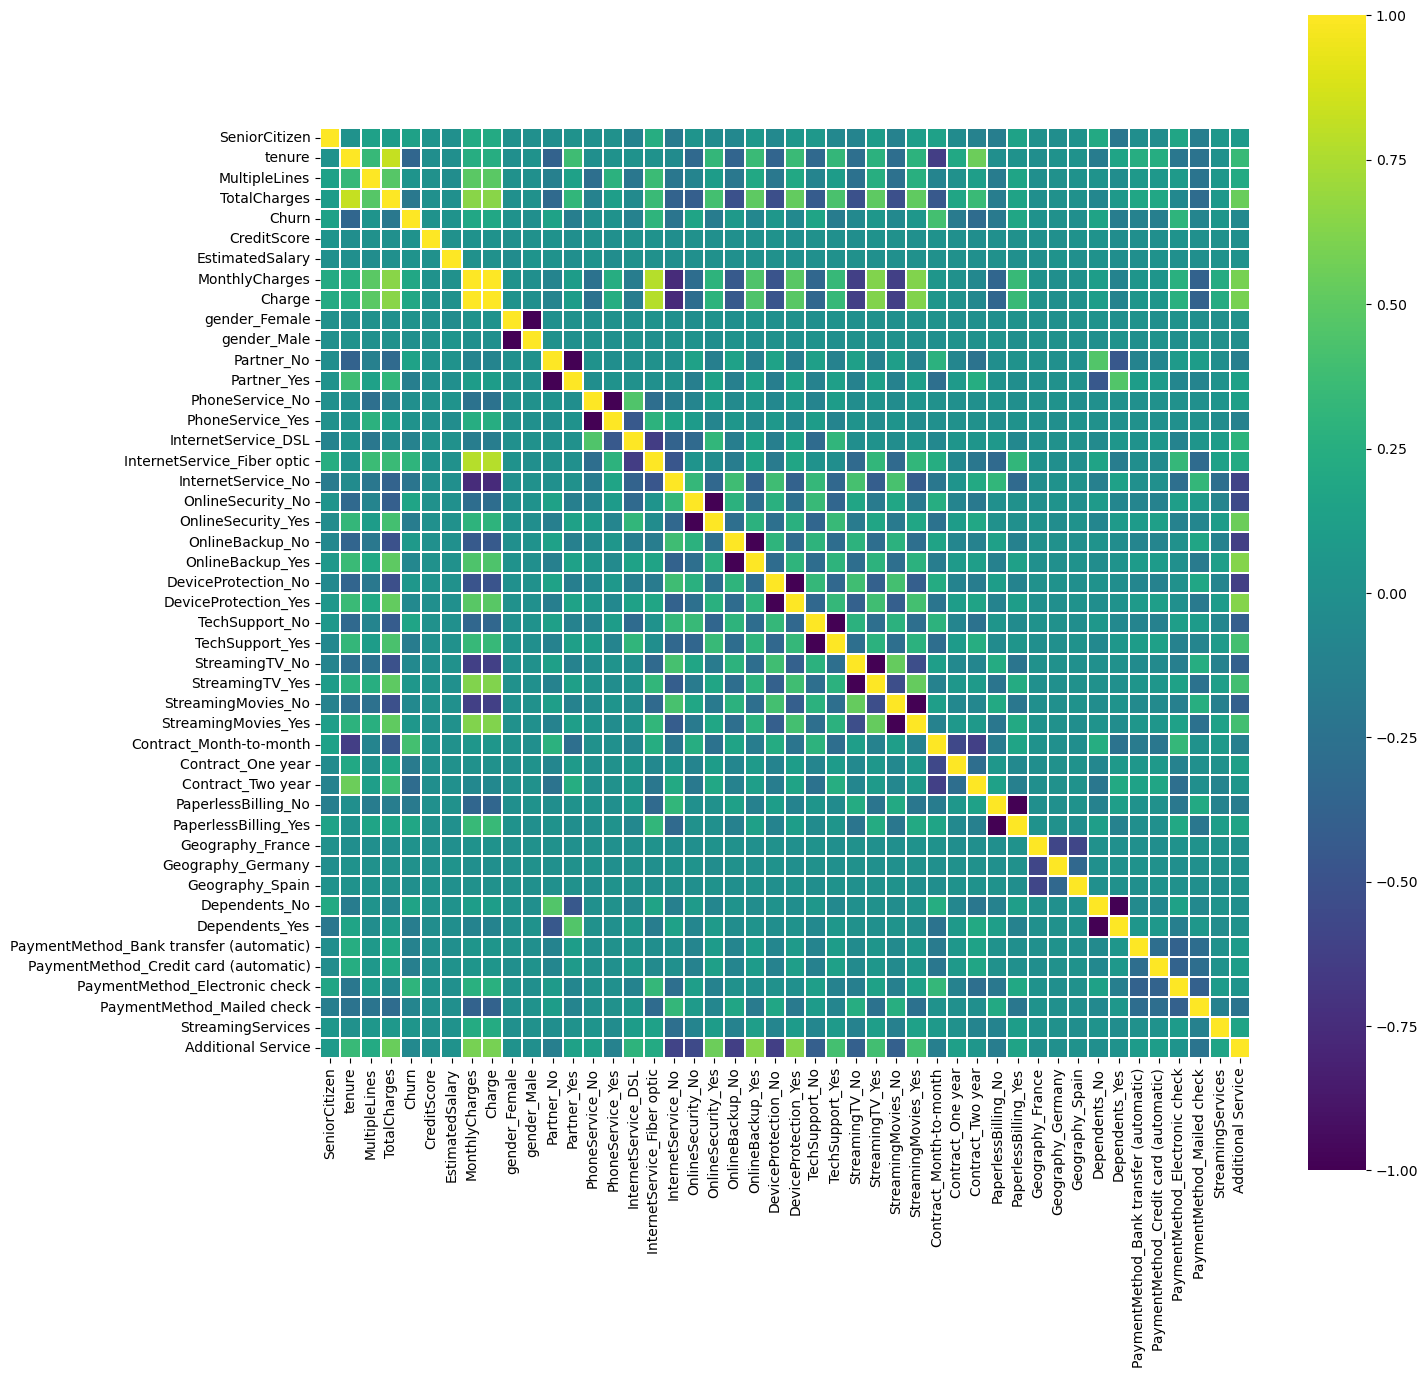

In [8]:
#Correlations table
corr2 = churn_df_encoded.corr()
plt.figure(figsize=(15, 15))

# Only show the strong correlations
sns.heatmap(corr2,
            cmap='viridis',
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=False,
            annot_kws={"size": 10},
            square=True);

In the code bellow are the variables that we are going to use to create a model that predicts the churn rate.

In [9]:
# Features selection for testing the model
x_var_2 = ['SeniorCitizen',
 'tenure',
'TotalCharges',
'CreditScore',
'EstimatedSalary',
 'MonthlyCharges',
'Charge',   
'gender_Female',
 'gender_Male',
 'Dependents_No',
'Dependents_Yes',
'MultipleLines',
'InternetService_DSL',
'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'Partner_No',
 'Partner_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 # 'DeviceProtection_No',
 # 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',       
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
'PaymentMethod_Bank transfer (automatic)',
'PaymentMethod_Credit card (automatic)',
'PaymentMethod_Electronic check',
'PaymentMethod_Mailed check',
'StreamingServices',
#'Additional Service'
          ]

## Improving the parameters

Now we are improving our x-variables by scaling them and using smote library to create a synthetic data for our y-variables.

In [10]:
# Specify explanatory variables
X_var = churn_df_encoded.loc[:, x_var_2]

# Specify response variable
y_var = churn_df_encoded.loc[:, "Churn"]


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X_var.values,
            y_var,
            test_size    = 0.3,
            random_state = 219,
            stratify     = y_var)

# Scale the all features and responses
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Oversample using SMOTE library
so = SMOTE(random_state=0)

# Fit oversample to the training sets
os_data_x,os_data_y = so.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = [x_var_2] )
os_data_y= pd.Series(data=os_data_y)

## Model Building

Finally, we are using GBM model to classify the dataset, tune the hyperparameters and evaluate the performance of the model.

In [11]:
# declaring a z~~ space
learn_space        = np.arange(0.1, 3.0, 0.1)
estimator_space    = np.arange(120, 150, 10)
depth_space        = np.arange(3, 5, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate'     : learn_space,
              'n_estimators'      : estimator_space,
              'max_depth'         : depth_space,
              'warm_start'        : warm_start_space}

# Create instance of the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 10)

# GridSearchCV object
gbm_cv = RandomizedSearchCV(estimator          = gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))

# Fitting to the full data set
gbm_cv.fit(X_var.values, y_var)


#################### Gradient Boosting Model Tuning #########################


# Incorporate the Gradient Boosting Model
gbm_tuned = gbm_cv.best_estimator_

# Fit Gradient Boosting Model  (not using .best_estimator)
gbm_tuned = gbm_tuned.fit(os_data_x.values, os_data_y)

# Use Gradient Boosting Model to predict, using the test data
gbm_tuned_pred = gbm_tuned.predict(X_test)


print(classification_report(y_test, gbm_tuned_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1772
         1.0       0.87      0.82      0.85       628

    accuracy                           0.92      2400
   macro avg       0.91      0.89      0.90      2400
weighted avg       0.92      0.92      0.92      2400



The f1-score represents the level of accuracy of the model. The model represents an 85% of success chance to predict when a client churns, 95% of success when the client is not churning, with an overall accuracy of 92%. This means that our model is accurate in terms of predicting the churn rate.


=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: 43

-------------------------------------

GBM Training Score : 0.5
GBM Testing Score  : 0.9217
GBM Train-Test Gap : 0.4217

GBM AUC Score      : 0.8884

-------------------------------------


[[ 514  114]
 [  74 1698]]


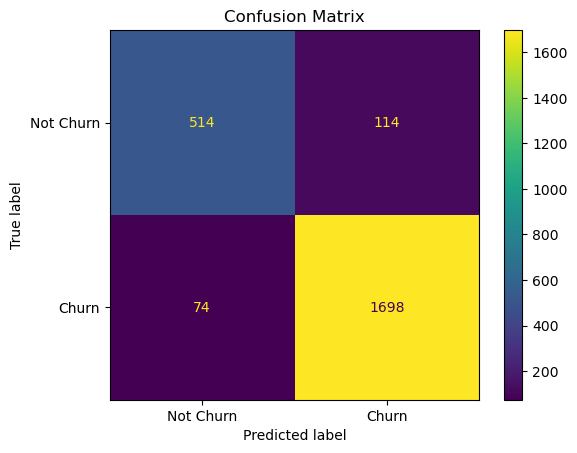

In [12]:
# Use the tuned GBM model to predict the training and test data
gbm_tuned_train_pred = gbm_tuned.predict(os_data_x.values)
gbm_tuned_test_pred = gbm_tuned.predict(X_test)

# Calculate scores for the tuned model
gbm_tuned_train_score = gbm_tuned.score(os_data_x.values, os_data_y).round(4)
gbm_tuned_test_score = gbm_tuned.score(X_test, y_test).round(4)
gbm_tuned_test_gap = abs(gbm_tuned_test_score - gbm_tuned_train_score).round(4)
gbm_tuned_auc_score = roc_auc_score(y_true=y_test, y_score=gbm_tuned_test_pred).round(4)
gbm_tuned_report = classification_report(y_test, gbm_tuned_test_pred, target_names=['Churn (0)', 'Churn (1)'])

# Print the results for the tuned model
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: {X_var.shape[1] + 1}

-------------------------------------

GBM Training Score : {gbm_tuned_train_score}
GBM Testing Score  : {gbm_tuned_test_score}
GBM Train-Test Gap : {gbm_tuned_test_gap}

GBM AUC Score      : {gbm_tuned_auc_score}

-------------------------------------

""")

# Unpack confusion matrix
gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp = confusion_matrix(y_true=y_test, y_pred=gbm_tuned_test_pred).ravel()

# Compute confusion matrix

confusion_matrix(y_test, gbm_tuned_test_pred)
cnf_matrix = confusion_matrix(y_test, gbm_tuned_test_pred, labels=[1,0])
print(cnf_matrix)
# Assess performance by plotting non-normalized confusion matrix
# Plot confusion matrix
labels = ['Not Churn', 'Churn']
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

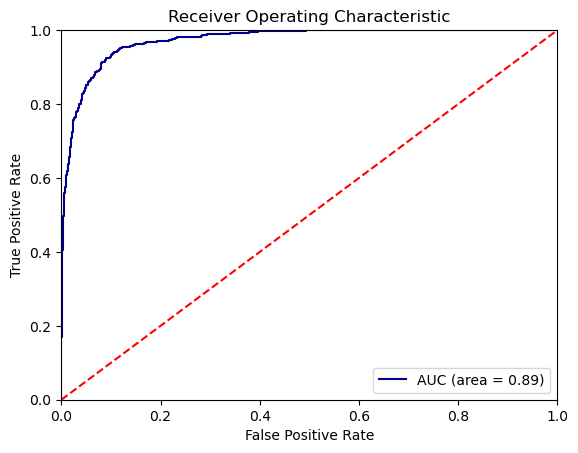

In [13]:
# Calculate the FPR and TPR for all thresholds of the classification
Gbm_roc_auc = roc_auc_score(y_test, gbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm_tuned.predict_proba(X_test)[:,1])

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'darkblue', label = 'AUC (area = %0.2f)' % Gbm_roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

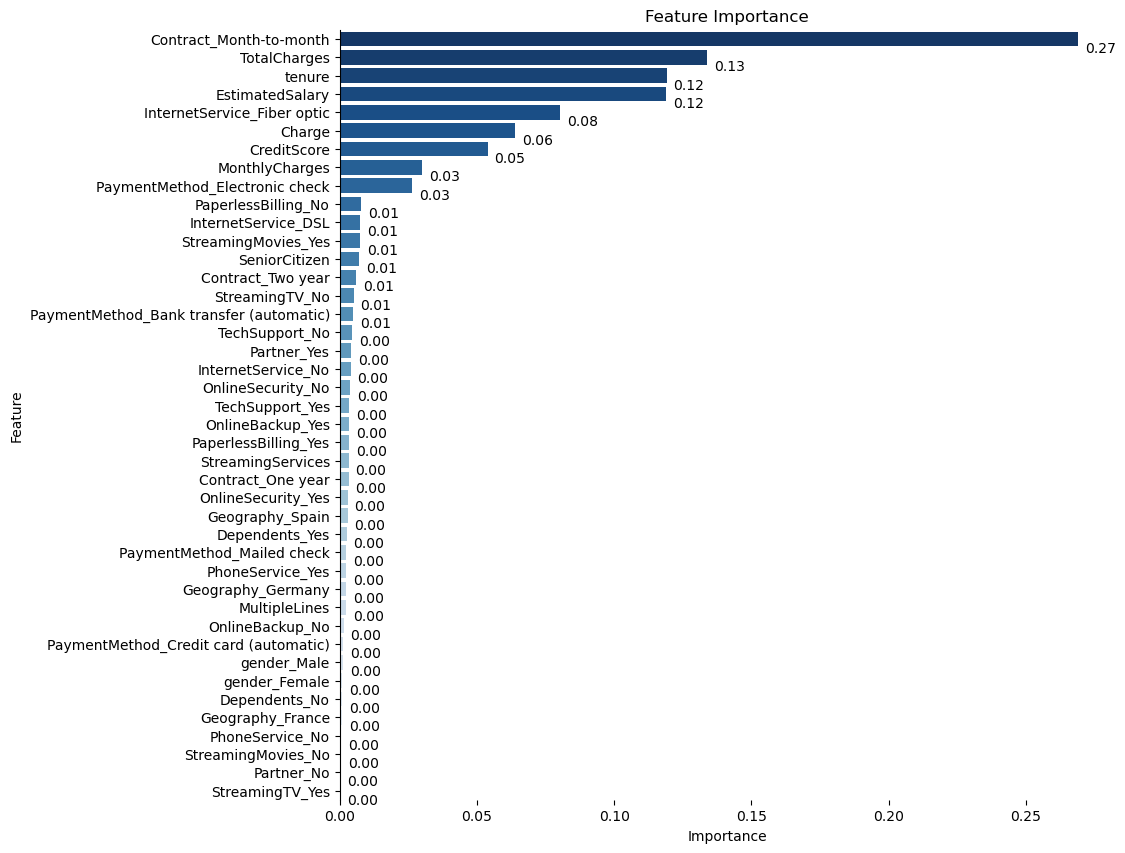

In [14]:
# Plotting feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_tuned.feature_importances_, X_var.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'Blues_r')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

The most important features to predict a potential churn are: the type of contract, the total charges per client, the tenure of the client, the client's estimated salary and the type of internet service.

Below is the behavior of the features that inspired or recommendations.

Impact of the internet service:

In [15]:
yes = file[file['Churn'] == 'Yes']
internetchurn = yes.groupby(['InternetService']).mean()
internetchurn = internetchurn.drop(internetchurn.columns[0], axis = 1)
internetchurn.head(10)

,SeniorCitizen,tenure,CreditScore,EstimatedSalary,MonthlyCharges,Charge
InternetService,,,,,,
DSL,0.174603,13.801587,654.266402,104730.786461,48.949802,48.916568
Fiber optic,0.299306,20.040362,652.900209,102667.655438,88.168958,88.181897
No,0.056000,7.837398,629.968000,100087.178000,20.320400,20.320400


Fiber Optic Causes the Charge to be more expensive.

Impact on the type of contract with the churn:

In [16]:
churn =file[file['Churn'] == 'Yes']
churn = churn.groupby(['Contract'], as_index = False).size().sort_values(by = 'size', ascending = False).reset_index()
churn = churn.drop(churn.columns[0], axis = 1)
churn

,Contract,size
0,Month-to-month,1853
1,One year,183
2,Two year,50


Churn is associated with small term contracts.